In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Path = 'content/drive/My Drive/Colab Notebooks/nwdaf_train.csv'

In [5]:
import pandas as pd
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nwdaf_train.csv', sep=',')

In [6]:
train_set.tail()

,t,cell_id,cat_id,pe_id,load,has_anomaly,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
1295995,17279,4,2,0,2.984396,0,2.992857,23.975682,19.892987,400.241689,5.645876,95.764741,3.991280,-67.699659,-85.925735
1295996,17279,4,2,1,19.591826,0,3.986447,20.165262,13.614927,-40.174436,50.211980,-75.196884,-2.004100,-3.001318,-74.692256
1295997,17279,4,2,2,90.086700,0,11.288111,7.140484,15.938352,556.475310,828.672477,-579.757968,16.607429,11.618932,10.621715
1295998,17279,4,2,3,1.006407,0,54.839263,29.412855,26.573780,359.817789,-424.477943,406.507694,70.494874,67.510478,62.521981
1295999,17279,4,2,4,6.020185,0,45.546553,28.417332,26.196507,-98.882846,126.364213,-154.156057,-89.080292,-108.672118,-111.656514


In [7]:
import matplotlib.pyplot as plt
import seaborn
train_set1 = train_set[['last2_mean','last4_mean','last8_mean','per_change_last2','per_change_last3','per_change_last4','change_last2','change_last3','change_last4']]
train_set1.head()

,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
0,0.000000,0.000000,0.000000,120.273863,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.997074,4.997074,4.997074,220.273863,120.273863,0.000000,4.997074,4.997074,4.997074
2,10.500698,10.500698,10.500698,220.273863,202.738627,220.273863,11.007248,11.007248,6.010174
3,34.494854,24.662261,24.662261,231.069230,-335.970115,290.572082,36.981064,31.983990,31.983990
4,26.992577,18.746637,18.746637,-98.113127,140.573616,-183.850690,-51.985619,-67.989941,-72.987015


In [8]:
train_set1.corr()

,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
last2_mean,1.000000e+00,0.420936,0.648442,-0.202197,-0.397743,0.371929,-7.555296e-09,0.184724,0.405477
last4_mean,4.209356e-01,1.000000,0.631950,-0.203184,-0.823903,0.782707,-1.117212e-01,-0.276915,-0.344950
last8_mean,6.484416e-01,0.631950,1.000000,0.087509,-0.501123,0.539646,-8.763264e-02,-0.259632,0.009903
per_change_last2,-2.021973e-01,-0.203184,0.087509,1.000000,0.175465,-0.009590,6.580529e-01,0.295973,0.455131
per_change_last3,-3.977426e-01,-0.823903,-0.501123,0.175465,1.000000,-0.965316,-1.392683e-01,-0.028226,0.085357
per_change_last4,3.719287e-01,0.782707,0.539646,-0.009590,-0.965316,1.000000,3.077570e-01,0.126063,0.041753
change_last2,-7.555296e-09,-0.111721,-0.087633,0.658053,-0.139268,0.307757,1.000000e+00,0.854655,0.780425
change_last3,1.847245e-01,-0.276915,-0.259632,0.295973,-0.028226,0.126063,8.546551e-01,1.000000,0.878935
change_last4,4.054765e-01,-0.344950,0.009903,0.455131,0.085357,0.041753,7.804252e-01,0.878935,1.000000


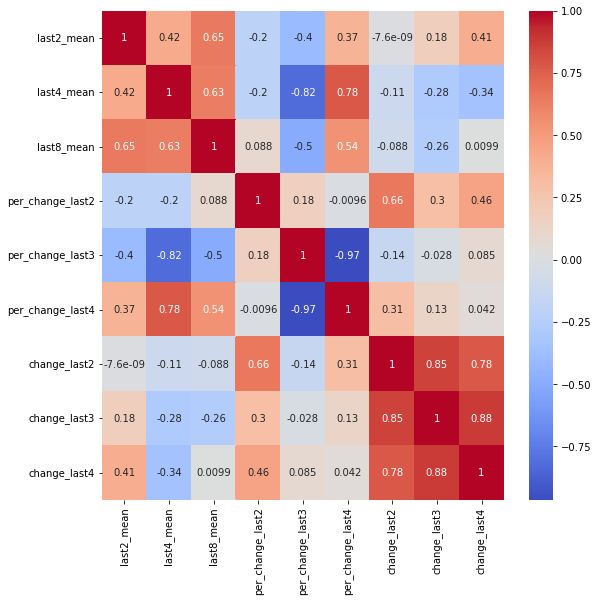

In [9]:
plt.figure(figsize=(9,9))
seaborn.heatmap(train_set1.corr(), annot=True,cmap="coolwarm")

In [10]:
X = train_set1.iloc[:10 :]
y = train_set1.iloc[10:20 :]

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

X_train = X_ss[:10, :]
X_test = X_ss[:20, :]

y_train = y_mm[:10, :]
y_test = y_mm[:20, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (10, 9) (10, 9)
Testing Shape (10, 9) (10, 9)


In [12]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [13]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 


X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

y_train_tensors_final = torch.reshape(y_train_tensors,   (y_train_tensors.shape[0], 1, y_train_tensors.shape[1]))
y_test_tensors_final = torch.reshape(y_test_tensors,  (y_test_tensors.shape[0], 1, y_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors_final.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors_final.shape) 

Training Shape torch.Size([10, 1, 9]) torch.Size([10, 1, 9])
Testing Shape torch.Size([10, 1, 9]) torch.Size([10, 1, 9])


In [14]:
import torch
import torchvision
import torch.nn as tn
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.utils as utils

In [15]:
train_dataLoader = torch.utils.data.DataLoader(X_train_tensors_final, batch_size=1,shuffle=True)
test_dataLoader = torch.utils.data.DataLoader(X_test_tensors_final,batch_size=1,shuffle=False)

In [16]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
class Logistic_Reg_model(torch.nn.Module):
 def __init__(self,no_input_features):
   super(Logistic_Reg_model,self).__init__()
   self.layer1=torch.nn.Linear(no_input_features,10)
   self.layer2=torch.nn.Linear(10,9)
 def forward(self,x):
   y_predicted=self.layer1(x)
   y_predicted=torch.sigmoid(self.layer2(y_predicted))
   return y_predicted

In [18]:
n_features = 9
model=Logistic_Reg_model(n_features)

In [19]:
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [20]:
number_of_epochs=100
for epoch in range(number_of_epochs):
  y_prediction=model(X_train_tensors_final)
  loss= criterion(y_prediction,y_train_tensors_final)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1)%10 == 0:
    print('epoch:', epoch+1,',loss=',loss.item())

epoch: 10 ,loss= 0.7058936953544617
epoch: 20 ,loss= 0.7057303786277771
epoch: 30 ,loss= 0.7055671215057373
epoch: 40 ,loss= 0.7054043412208557
epoch: 50 ,loss= 0.7052416801452637
epoch: 60 ,loss= 0.7050792574882507
epoch: 70 ,loss= 0.7049171328544617
epoch: 80 ,loss= 0.7047551274299622
epoch: 90 ,loss= 0.7045934796333313
epoch: 100 ,loss= 0.7044318914413452


In [21]:
with torch.no_grad():
 y_pred=model(X_test_tensors_final)
 y_pred_class=y_pred.round()
 accuracy=(y_pred_class.eq(y_test_tensors_final).sum())/float(y_test.shape[0])
 print(accuracy.item())

1.100000023841858
